In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd


Step1:
import the excel file into Pythone or MATLAB program using this line of code:
data = xlsread("file_name.xlsx") 
or 
open('data.csv', 'r') as file:

In [21]:
data = pd.read_excel("salary_dataset.xlsx")
with open('salary_dataset.csv', 'r') as f:
  print(f)
print(data)

<_io.TextIOWrapper name='salary_dataset.csv' mode='r' encoding='cp874'>
     age  experience   gpa     degree    position   salary
0   30.0         7.0  3.94   bachelor    engineer  32500.0
1   26.0         2.0  2.86   bachelor         NaN  22500.0
2   27.0         0.0  3.13  doctorate   secretary  37000.0
3   32.0         NaN  3.10   bachelor    engineer  24500.0
4   24.0         1.0  3.81   bachelor  accountant  23500.0
..   ...         ...   ...        ...         ...      ...
86   NaN         5.0  3.27  doctorate   secretary  36000.0
87  28.0         7.0  2.64  doctorate   secretary  38000.0
88  26.0         1.0  2.52   bachelor   secretary      NaN
89  27.0         2.0  3.79     master    engineer  35000.0
90   NaN         NaN  5.88        NaN         NaN      NaN

[91 rows x 6 columns]


Step2:
Clean up the missing value in both salary and experience columns in the imported data variable using the "isnan" command, like indexCol6Empty = isnan(data(,6)). Then, using the logical operator: (and, or) to combine the row-wise index that contains data from both columns (salary & experience).

(Hint: you can use the "find' command to help you search along the row of index that you get. Or perform manually)

In [22]:
# ตรวจสอบค่าที่หายไปในคอลัมน์ salary
salary_missing = pd.isna(data['salary'])
print("missing values in 'salary' column:", salary_missing.sum())

# ตรวจสอบค่าที่หายไปในคอลัมน์ experience
experience_missing = pd.isna(data['experience'])
print("missing values in 'experience' column:", experience_missing.sum())

missing values in 'salary' column: 2
missing values in 'experience' column: 2


In [23]:
# หา index ของค่าที่หายไปในคอลัมน์ salary
salary_missing_index = data[salary_missing].index.tolist()
print("missing values in 'salary':", salary_missing_index)

# หา index ของค่าที่หายไปในคอลัมน์ experience
experience_missing_index = data[experience_missing].index.tolist()
print("missing values in 'experience':", experience_missing_index)

missing values in 'salary': [88, 90]
missing values in 'experience': [3, 90]


In [25]:
index_salary_empty = np.isnan(data.iloc[:, 5])
index_experience_empty = np.isnan(data.iloc[:, 1])

# รวม index ที่มีค่าหายไปในทั้งสองคอลัมน์โดยใช้ Logic AND
combined_index_AND = index_salary_empty & index_experience_empty

# ใช้ numpy.where() เพื่อตรวจสอบ index ที่มีค่าหายไป
rows_with_missing_values_AND = np.where(combined_index_AND)[0]
print("Index of rows with missing values:", rows_with_missing_values_AND)

Index of rows with missing values: [90]


In [26]:
index_salary_empty = np.isnan(data.iloc[:, 5])
index_experience_empty = np.isnan(data.iloc[:, 1])

# รวม index ที่มีค่าหายไปในทั้งสองคอลัมน์โดยใช้ Logic OR
combined_index_OR = index_salary_empty | index_experience_empty

# ใช้ numpy.where() เพื่อตรวจสอบ index ที่มีค่าหายไป
rows_with_missing_values_OR = np.where(combined_index_OR)[0]

print("Index of rows with missing values:", rows_with_missing_values_OR)

Index of rows with missing values: [ 3 88 90]


In [27]:
# ทำความสะอาดข้อมูลโดยการลบแถวที่มีค่าที่หายไป
data_cleaned = data.dropna()
print(data_cleaned)

     age  experience   gpa     degree    position   salary
0   30.0         7.0  3.94   bachelor    engineer  32500.0
2   27.0         0.0  3.13  doctorate   secretary  37000.0
4   24.0         1.0  3.81   bachelor  accountant  23500.0
5   35.0         7.0  3.93  doctorate   secretary  43500.0
6   23.0         1.0  3.78     master  accountant  30500.0
..   ...         ...   ...        ...         ...      ...
83  35.0        11.0  3.06  doctorate    engineer  53000.0
84  32.0         4.0  3.54   bachelor  accountant  32000.0
85  31.0         1.0  2.79     master    engineer  34000.0
87  28.0         7.0  2.64  doctorate   secretary  38000.0
89  27.0         2.0  3.79     master    engineer  35000.0

[86 rows x 6 columns]


Step3:
Explore the data by plotting both salary & experience columns with "'x" markers to visualize and to validate the linear-relation assumption.

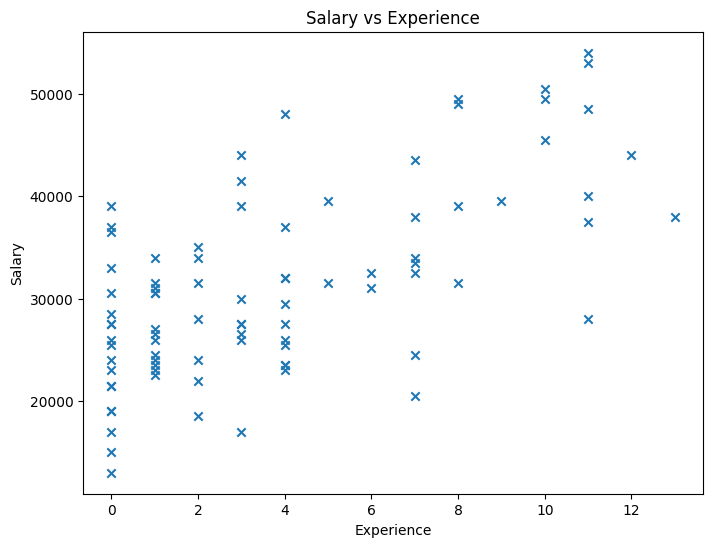

In [28]:
import matplotlib.pyplot as plt
# Scatter plot for salary vs experience
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['experience'], data_cleaned['salary'], marker='x')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()


Step4:
Use the Linear Regression technique to compute the unknown weight coefficients (w vector), please write value of these coefficient along with the objective function of the Linear Regression technique.

In [ ]:
# Prepare the data
X = data_cleaned['experience'].values.reshape(-1, 1)
y = data_cleaned['salary'].values

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients
w0 = model.intercept_
w1 = model.coef_[0]

print("Intercept (w0):", w0)
print("Coefficient (w1):", w1)

# Objective function of Linear Regression
print("\nObjective Function of Linear Regression: Minimize 1/2 * sum((y_pred - y_true)^2)")

Intercept (w0): 25111.479843901267
Coefficient (w1): 1620.5822762069215

Objective Function of Linear Regression: Minimize 1/2 * sum((y_pred - y_true)^2)


Step5:
Plot the graph of straight line from Linear Regression model, overlaying the plot in Step3 (shown in Figure 1 below).

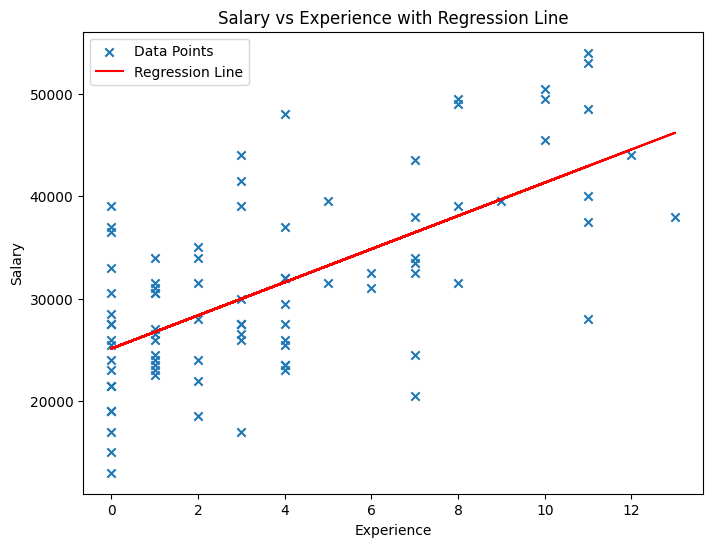

In [ ]:
# prompt: Plot the graph of straight line from Linear Regression model, overlaying the plot in Step3 (shown in Figure 1 below)

import matplotlib.pyplot as plt
# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['experience'], data_cleaned['salary'], marker='x', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience with Regression Line')
plt.legend()
plt.show()

HW 4.9
From the data contained in the "salary_dataset.xlsx" file.

Repeat Using the Linear Regression to discover

the relationship model between the salary and the GPA.

Intercept (w0): 25833.190165462547
Coefficient (w1): 1682.3153843460798


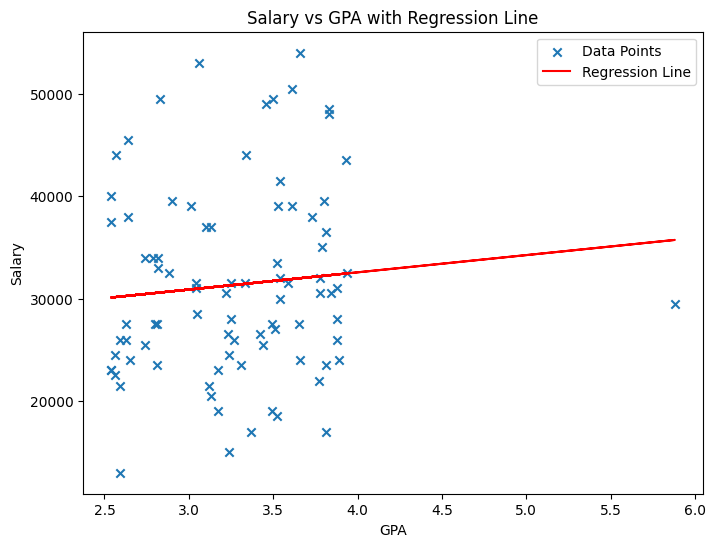

In [ ]:
# prompt: From the data contained in the "salary_dataset.xlsx" file.
# Repeat Using the Linear Regression to discover
# the relationship model between the salary and the GPA

import matplotlib.pyplot as plt
# Prepare the data
X = data_cleaned['gpa'].values.reshape(-1, 1) # Use 'gpa' (lowercase)
y = data_cleaned['salary'].values

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients
w0 = model.intercept_
w1 = model.coef_[0]

print("Intercept (w0):", w0)
print("Coefficient (w1):", w1)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['gpa'], data_cleaned['salary'], marker='x', label='Data Points') # Use 'gpa' (lowercase)
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('GPA')
plt.ylabel('Salary')
plt.title('Salary vs GPA with Regression Line')
plt.legend()
plt.show()

HW 4.10
From the data contained in the "salary_dataset.xlsx" file.

Repeat Using the Linear Regression to discover

the relationship model between the salary and experience

Intercept (w0): 25111.479843901267
Coefficient (w1): 1620.5822762069215


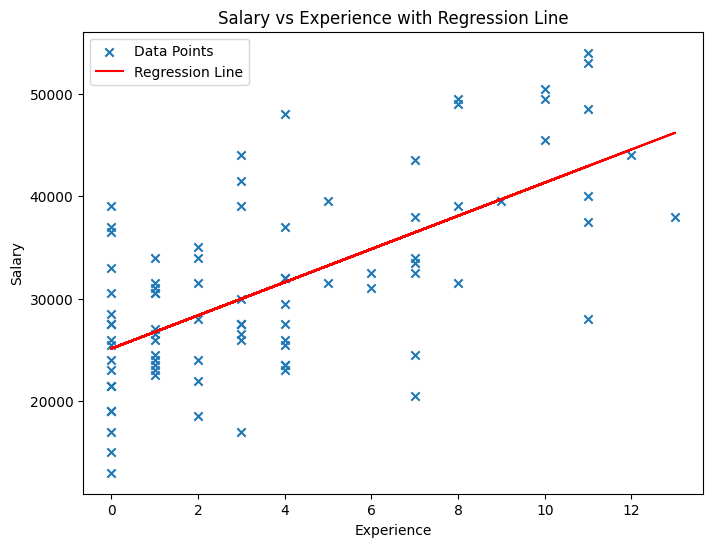

In [ ]:
# prompt: From the data contained in the "salary_dataset.xlsx" file.
# Repeat Using the Linear Regression to discover
# the relationship model between the salary and experience

import matplotlib.pyplot as plt
# Prepare the data
X = data_cleaned['experience'].values.reshape(-1, 1)
y = data_cleaned['salary'].values

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients
w0 = model.intercept_
w1 = model.coef_[0]

print("Intercept (w0):", w0)
print("Coefficient (w1):", w1)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['experience'], data_cleaned['salary'], marker='x', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience with Regression Line')
plt.legend()
plt.show()